<a href="https://colab.research.google.com/github/Amaayu/Amaayu/blob/main/Amazon_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amazon ML Challenge

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('train.csv')

In [8]:
import pandas as pd
try:
    data = pd.read_csv('/content/train.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
except UnicodeDecodeError:
    data = pd.read_csv('/content/train.csv', engine='python', encoding='latin-1', on_bad_lines='skip')

In [9]:
data

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490
...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275


# STEP 2: Define Feature Extraction Functions

In [10]:
def extract_title(text):
    match = re.search(r'Item Name:\s*(.*?)(?:\n|$)', str(text))
    return match.group(1).strip() if match else None

In [11]:
def extract_bullets(text):
    return re.findall(r'Bullet Point \d+: (.*?)(?=\n|$)', str(text))


In [12]:
def extract_description(text):
    match = re.search(r'Product Description:\s*(.*)', str(text), re.DOTALL)
    return match.group(1).strip() if match else None

In [13]:
def extract_value(text):
    match = re.search(r'Value:\s*([\d\.]+)', str(text))
    return float(match.group(1)) if match else None


In [14]:
def extract_unit(text):
    match = re.search(r'Unit:\s*([A-Za-z ]+)', str(text))
    return match.group(1).strip() if match else None


# STEP 3: Apply Functions on DataFrame

In [15]:
import re
import pandas as pd

def extract_title(text):
    match = re.search(r'Item Name:\s*(.*?)(?:\n|$)', str(text))
    return match.group(1).strip() if match else None

def extract_bullets(text):
    return re.findall(r'Bullet Point \d+: (.*?)(?=\n|$)', str(text))

def extract_description(text):
    match = re.search(r'Product Description:\s*(.*)', str(text), re.DOTALL)
    return match.group(1).strip() if match else None

def extract_value(text):
    match = re.search(r'Value:\s*([\d\.]+)', str(text))
    return float(match.group(1)) if match else None

def extract_unit(text):
    match = re.search(r'Unit:\s*([A-Za-z ]+)', str(text))
    return match.group(1).strip() if match else None

data['title'] = data['catalog_content'].apply(extract_title)
data['bullets'] = data['catalog_content'].apply(extract_bullets)
data['description'] = data['catalog_content'].apply(extract_description)
data['value'] = data['catalog_content'].apply(extract_value)
data['unit'] = data['catalog_content'].apply(extract_unit)

# STEP 4: Split Bullet Points into Separate Columns

In [16]:
for i in range(5):  # bullet_1 to bullet_5
    data[f'bullet_{i+1}'] = data['bullets'].apply(lambda x: x[i] if len(x) > i else None)

#STEP 5: Extra Useful Features

In [17]:
data['title_length'] = data['title'].apply(lambda x: len(x) if isinstance(x, str) else 0)
data['bullet_count'] = data['bullets'].apply(lambda x: len(x))
data['desc_length'] = data['description'].apply(lambda x, data=data: len(x) if isinstance(x, str) else 0) # Added data=data to fix potential NameError

# STEP 6: Preview Final DataFrame

In [18]:
data

,sample_id,catalog_content,image_link,price,title,bullets,description,value,unit,bullet_1,bullet_2,bullet_3,bullet_4,bullet_5,title_length,bullet_count,desc_length
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.890,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",[],None,72.00,Fl Oz,None,None,None,None,None,55,0,0
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.120,"Salerno Cookies, The Original Butter Cookies, ...",[Original Butter Cookies: Classic butter cooki...,None,32.00,Ounce,Original Butter Cookies: Classic butter cookie...,Variety Pack: Includes 4 boxes with 32 cookies...,Occasion Perfect: Delicious cookies for birthd...,Shareable Treats: Fun to give and enjoy with f...,Salerno Brand: Trusted brand of delicious butt...,65,5,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.970,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",[Loaded with hearty long grain wild rice and v...,None,11.40,Ounce,Loaded with hearty long grain wild rice and ve...,Full of hearty goodness,Single serve bowls,Easy to prepare mix,0 grams trans fat,76,5,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.340,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,"[Add to your favorite appetizers, dips & sprea...",Judees Powdered Blue Cheese cheddar cheese pow...,11.25,Ounce,"Add to your favorite appetizers, dips & spread...","Sprinkle over french fries, fried chicken, mas...",Made in a dedicated gluten-free facility and s...,"Ingredients: Blue Cheese (Milk, Salt, Cultures...","Since 2009, Judee’s has been dedicated to prov...",153,5,534
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.490,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",[],None,12.00,Count,None,None,None,None,None,52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,41424,Item Name: ICE BREAKERS Spearmint Sugar Free M...,https://m.media-amazon.com/images/I/81p9PcPsff...,10.395,"ICE BREAKERS Spearmint Sugar Free Mints Tins, ...",[Contains eight (8) 1.5-ounce tins of ICE BREA...,None,12.00,Ounce,Contains eight (8) 1.5-ounce tins of ICE BREAK...,Keep a tin of delectable ICE BREAKERS mints in...,Sugar free breath mints are packed in a conven...,Use ICE BREAKERS mints for filling birthday gi...,Delicious mints with flavor crystals and a fre...,62,5,0
74996,35537,"Item Name: Davidson's Organics, Vanilla Essenc...",https://m.media-amazon.com/images/I/51DDKoa+mb...,35.920,"Davidson's Organics, Vanilla Essence, 100-coun...",[Vanilla Essence combines creamy carob with th...,None,100.00,count,Vanilla Essence combines creamy carob with the...,LEAF TO CUP: From our farms in India to your f...,ALWAYS ORGANIC: Davidson’s Organics is a 3rd g...,A CUP OF WELLNESS: Davidson’s offers a diverse...,TRUST OUR TEA: Davidson's Organics was the fir...,77,5,0
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Ras...,https://m.media-amazon.com/images/I/91R2XCcpUf...,50.330,Jolly Rancher Hard Candy - Blue Raspberry - 5 ...,[],5lb Blue Raspberry\nValue: 80.0\nUnit: Ounce,80.00,Ounce,None,None,None,None,None,66,0,42
74998,188322,Item Name: Nescafe Dolce Gusto Capsules - CARA...,https://m.media-amazon.com/images/I/51W40YU98+...,15.275,Nescafe Dolce Gusto Capsules - CARAMEL MACCHIA...,[Nescafe Dolce Gusto Caramel Latte Macchiato i...,None,16.00,Count,Nescafe Dolce Gusto Caramel Latte Macchiato is...,WHAT'S INSIDE - An irresistibly smooth latte s...,COFFEEHOUSE-QUALITY DRINKS - Create profession...,EASY TO PREPARE - Simply pop in the white milk...,SATISFACTION GUARANTEED: Covered by the Nestlé...,57,5,0


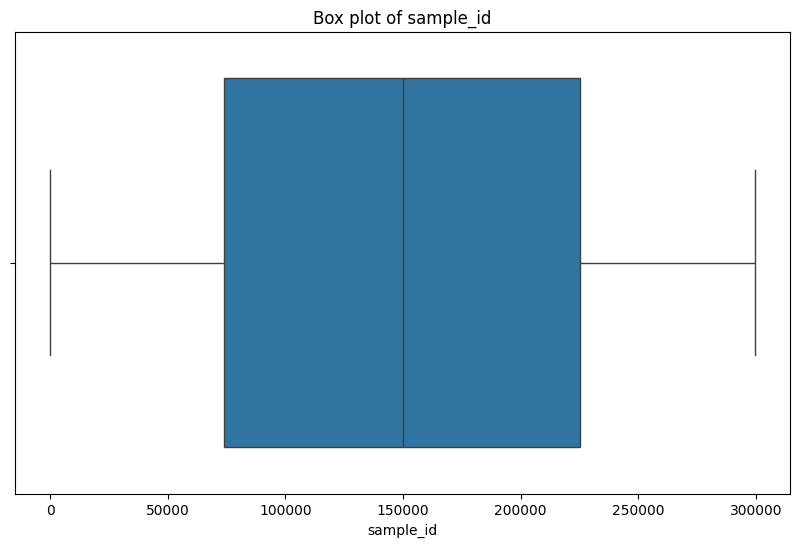

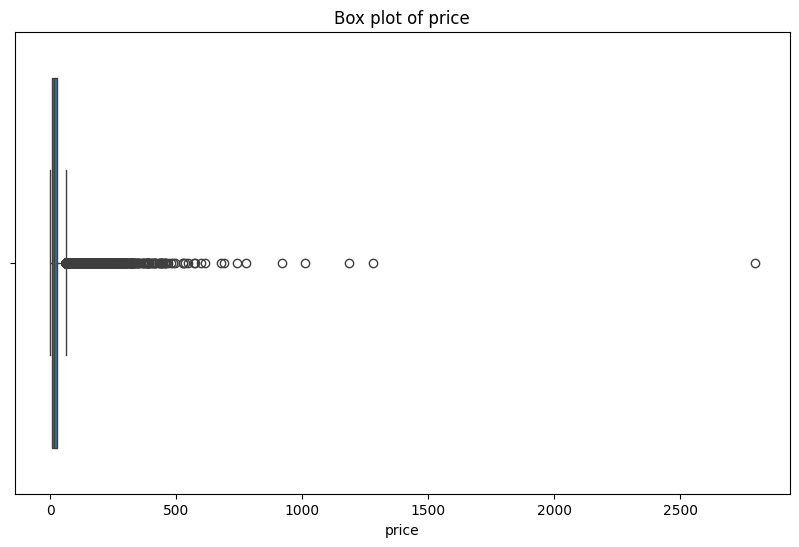

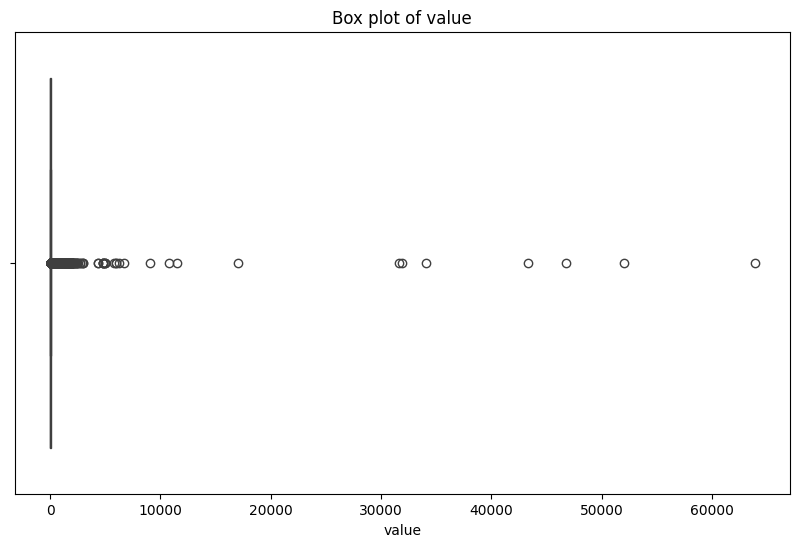

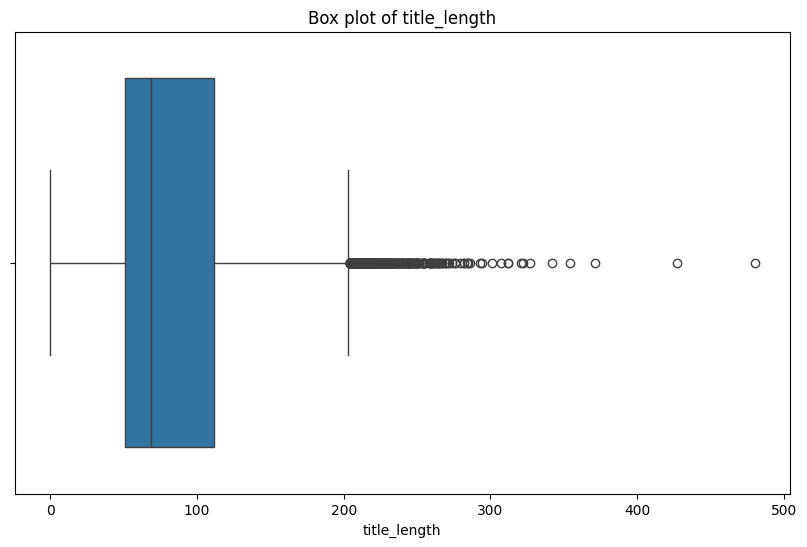

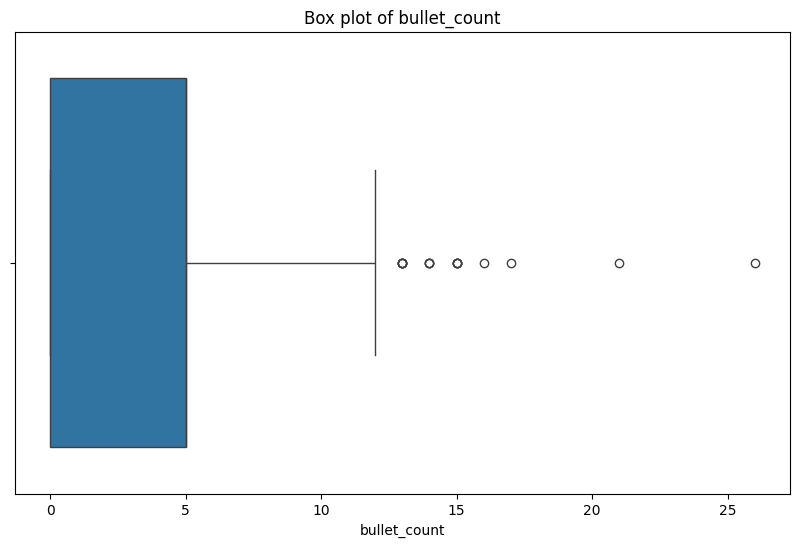

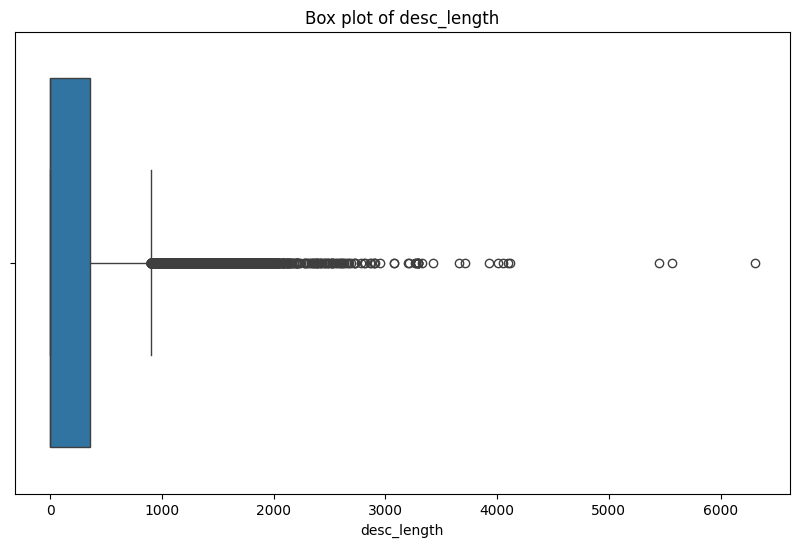

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify the numeric columns from the user's list
numeric_cols_for_outliers = ['sample_id', 'price', 'value', 'title_length', 'bullet_count', 'desc_length']
# Filter to include only columns that are actually in the DataFrame and are numeric
numeric_cols_for_outliers = [col for col in numeric_cols_for_outliers if col in data.columns and np.issubdtype(data[col].dtype, np.number)]

# Generate box plots for each numeric column to visualize outliers
for col in numeric_cols_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

# 7. Replace string "None" with real NaN

In [20]:
data = data.replace("None", pd.NA)

# 8. Fill missing values in important columns

In [21]:
data['bullets'] = data['bullets'].fillna("No bullets available")
data['description'] = data['description'].fillna("No description available")

# 9. Fill numeric columns with 0 (or mean/median if needed)

In [22]:
num_cols = ['price', 'value', 'bullet_count', 'desc_length', 'title_length']
for col in num_cols:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# 5. Drop rows where critical info like title or image_link is missing

In [23]:
data = data.dropna(subset=['title', 'image_link'])

# 6. Reset index after cleaning

In [24]:
data = data.reset_index(drop=True)

In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74993 entries, 0 to 74992
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        74993 non-null  int64  
 1   catalog_content  74993 non-null  object 
 2   image_link       74993 non-null  object 
 3   price            74993 non-null  float64
 4   title            74993 non-null  object 
 5   bullets          74993 non-null  object 
 6   description      74993 non-null  object 
 7   value            74993 non-null  float64
 8   unit             74053 non-null  object 
 9   bullet_1         54474 non-null  object 
 10  bullet_2         54474 non-null  object 
 11  bullet_3         52581 non-null  object 
 12  bullet_4         48131 non-null  object 
 13  bullet_5         41450 non-null  object 
 14  title_length     74993 non-null  int64  
 15  bullet_count     74993 non-null  int64  
 16  desc_length      74993 non-null  int64  
dtypes: float64(2

#EDA

In [26]:
data.shape

(74993, 17)

In [27]:
data.head()

,sample_id,catalog_content,image_link,price,title,bullets,description,value,unit,bullet_1,bullet_2,bullet_3,bullet_4,bullet_5,title_length,bullet_count,desc_length
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",[],No description available,72.00,Fl Oz,None,None,None,None,None,55,0,0
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,"Salerno Cookies, The Original Butter Cookies, ...",[Original Butter Cookies: Classic butter cooki...,No description available,32.00,Ounce,Original Butter Cookies: Classic butter cookie...,Variety Pack: Includes 4 boxes with 32 cookies...,Occasion Perfect: Delicious cookies for birthd...,Shareable Treats: Fun to give and enjoy with f...,Salerno Brand: Trusted brand of delicious butt...,65,5,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",[Loaded with hearty long grain wild rice and v...,No description available,11.40,Ounce,Loaded with hearty long grain wild rice and ve...,Full of hearty goodness,Single serve bowls,Easy to prepare mix,0 grams trans fat,76,5,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,"[Add to your favorite appetizers, dips & sprea...",Judees Powdered Blue Cheese cheddar cheese pow...,11.25,Ounce,"Add to your favorite appetizers, dips & spread...","Sprinkle over french fries, fried chicken, mas...",Made in a dedicated gluten-free facility and s...,"Ingredients: Blue Cheese (Milk, Salt, Cultures...","Since 2009, Judee’s has been dedicated to prov...",153,5,534
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",[],No description available,12.00,Count,None,None,None,None,None,52,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74993 entries, 0 to 74992
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        74993 non-null  int64  
 1   catalog_content  74993 non-null  object 
 2   image_link       74993 non-null  object 
 3   price            74993 non-null  float64
 4   title            74993 non-null  object 
 5   bullets          74993 non-null  object 
 6   description      74993 non-null  object 
 7   value            74993 non-null  float64
 8   unit             74053 non-null  object 
 9   bullet_1         54474 non-null  object 
 10  bullet_2         54474 non-null  object 
 11  bullet_3         52581 non-null  object 
 12  bullet_4         48131 non-null  object 
 13  bullet_5         41450 non-null  object 
 14  title_length     74993 non-null  int64  
 15  bullet_count     74993 non-null  int64  
 16  desc_length      74993 non-null  int64  
dtypes: float64(2

In [29]:
data.describe()

,sample_id,price,value,title_length,bullet_count,desc_length
count,74993.000000,74993.000000,74993.000000,74993.000000,74993.000000,74993.000000
mean,149839.537437,23.648928,53.628869,86.045791,3.485579,289.883136
std,86586.125272,33.378172,458.976375,48.164656,2.343731,519.481109
min,0.000000,0.130000,0.000000,1.000000,0.000000,0.000000
25%,73843.000000,6.800000,6.000000,51.000000,0.000000,0.000000
50%,150126.000000,14.000000,16.000000,69.000000,5.000000,0.000000
75%,225039.000000,28.630000,48.000000,112.000000,5.000000,360.000000
max,299438.000000,2796.000000,63882.000000,480.000000,26.000000,6304.000000


In [30]:
data.head()

,sample_id,catalog_content,image_link,price,title,bullets,description,value,unit,bullet_1,bullet_2,bullet_3,bullet_4,bullet_5,title_length,bullet_count,desc_length
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, ...",https://m.media-amazon.com/images/I/51mo8htwTH...,4.89,"La Victoria Green Taco Sauce Mild, 12 Ounce (P...",[],No description available,72.00,Fl Oz,None,None,None,None,None,55,0,0
1,198967,"Item Name: Salerno Cookies, The Original Butte...",https://m.media-amazon.com/images/I/71YtriIHAA...,13.12,"Salerno Cookies, The Original Butter Cookies, ...",[Original Butter Cookies: Classic butter cooki...,No description available,32.00,Ounce,Original Butter Cookies: Classic butter cookie...,Variety Pack: Includes 4 boxes with 32 cookies...,Occasion Perfect: Delicious cookies for birthd...,Shareable Treats: Fun to give and enjoy with f...,Salerno Brand: Trusted brand of delicious butt...,65,5,0
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy...",https://m.media-amazon.com/images/I/51+PFEe-w-...,1.97,"Bear Creek Hearty Soup Bowl, Creamy Chicken wi...",[Loaded with hearty long grain wild rice and v...,No description available,11.40,Ounce,Loaded with hearty long grain wild rice and ve...,Full of hearty goodness,Single serve bowls,Easy to prepare mix,0 grams trans fat,76,5,0
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz...,https://m.media-amazon.com/images/I/41mu0HAToD...,30.34,Judee’s Blue Cheese Powder 11.25 oz - Gluten-F...,"[Add to your favorite appetizers, dips & sprea...",Judees Powdered Blue Cheese cheddar cheese pow...,11.25,Ounce,"Add to your favorite appetizers, dips & spread...","Sprinkle over french fries, fried chicken, mas...",Made in a dedicated gluten-free facility and s...,"Ingredients: Blue Cheese (Milk, Salt, Cultures...","Since 2009, Judee’s has been dedicated to prov...",153,5,534
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Oun...",https://m.media-amazon.com/images/I/41sA037+Qv...,66.49,"kedem Sherry Cooking Wine, 12.7 Ounce - 12 per...",[],No description available,12.00,Count,None,None,None,None,None,52,0,0


#EDA STEPS

In [31]:
data.shape

(74993, 17)

In [32]:
data.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0
title,0
bullets,0
description,0
value,0
unit,940
bullet_1,20519


#Handle the all nulls bullet_Points

In [33]:
bullet_cols = [f'bullet_{i+1}' for i in range(5)]
for col in bullet_cols:
    data[col] = data[col].fillna("No bullet point available")

In [34]:
data.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0
title,0
bullets,0
description,0
value,0
unit,940
bullet_1,0


In [35]:
data['unit'] = data['unit'].fillna('Unknown')

In [36]:
data.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0
title,0
bullets,0
description,0
value,0
unit,0
bullet_1,0


In [37]:
data.describe()

,sample_id,price,value,title_length,bullet_count,desc_length
count,74993.000000,74993.000000,74993.000000,74993.000000,74993.000000,74993.000000
mean,149839.537437,23.648928,53.628869,86.045791,3.485579,289.883136
std,86586.125272,33.378172,458.976375,48.164656,2.343731,519.481109
min,0.000000,0.130000,0.000000,1.000000,0.000000,0.000000
25%,73843.000000,6.800000,6.000000,51.000000,0.000000,0.000000
50%,150126.000000,14.000000,16.000000,69.000000,5.000000,0.000000
75%,225039.000000,28.630000,48.000000,112.000000,5.000000,360.000000
max,299438.000000,2796.000000,63882.000000,480.000000,26.000000,6304.000000


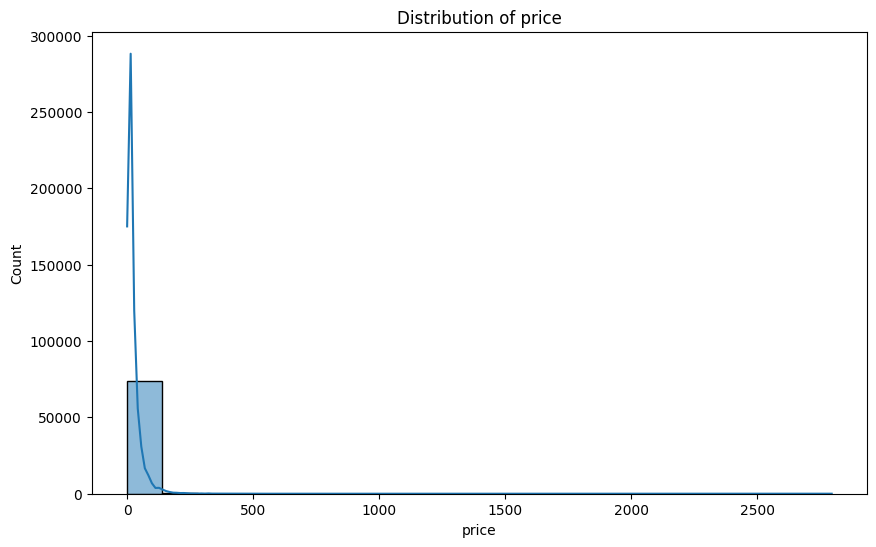

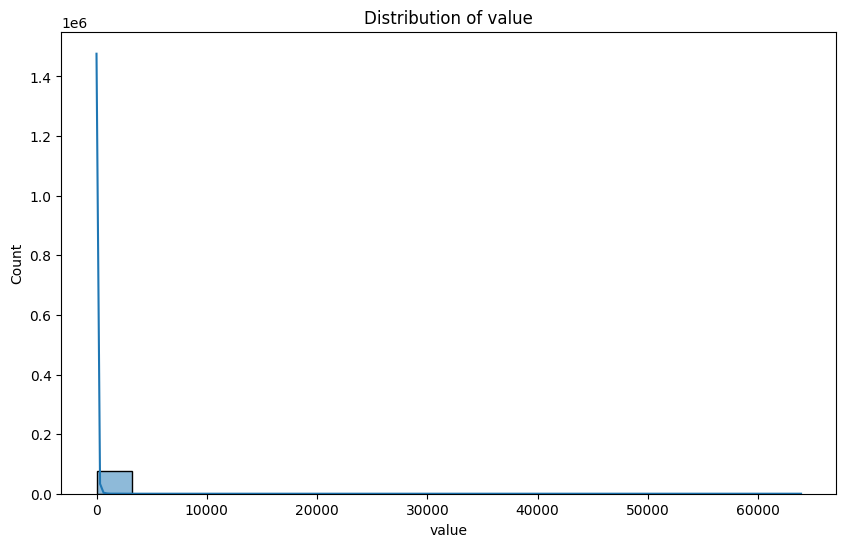

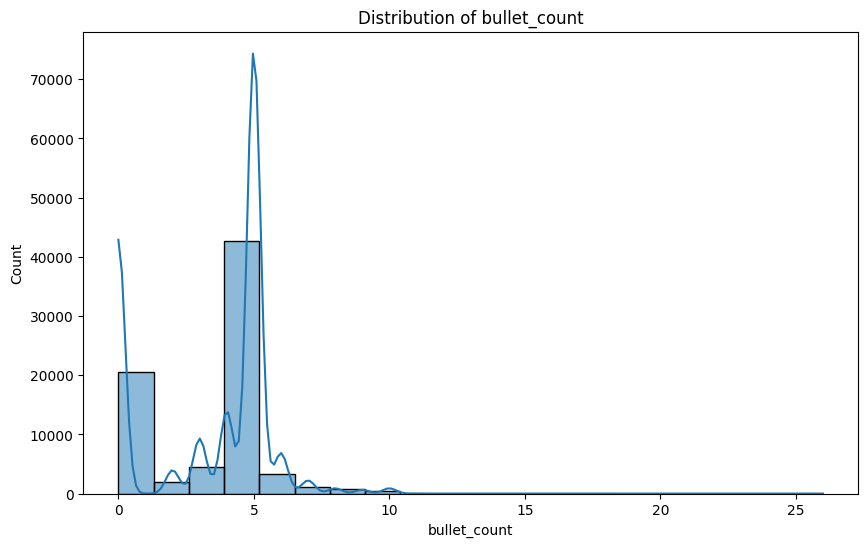

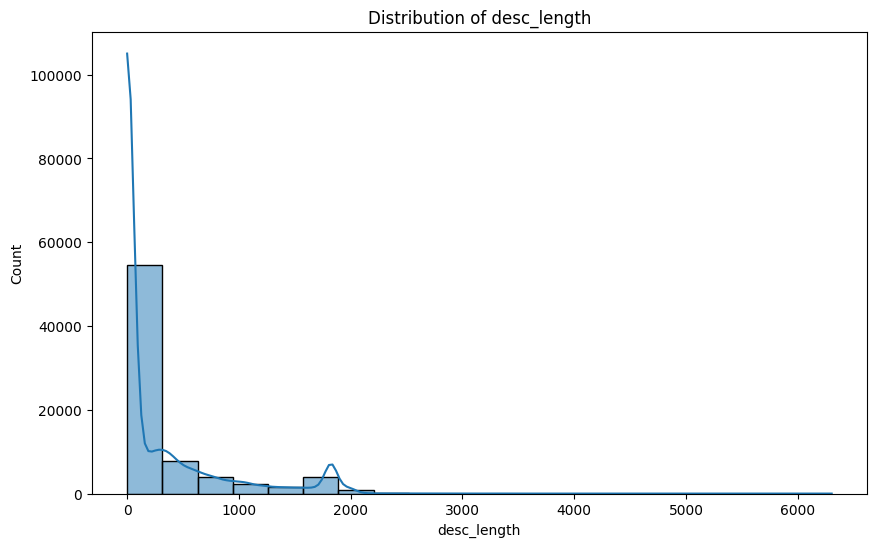

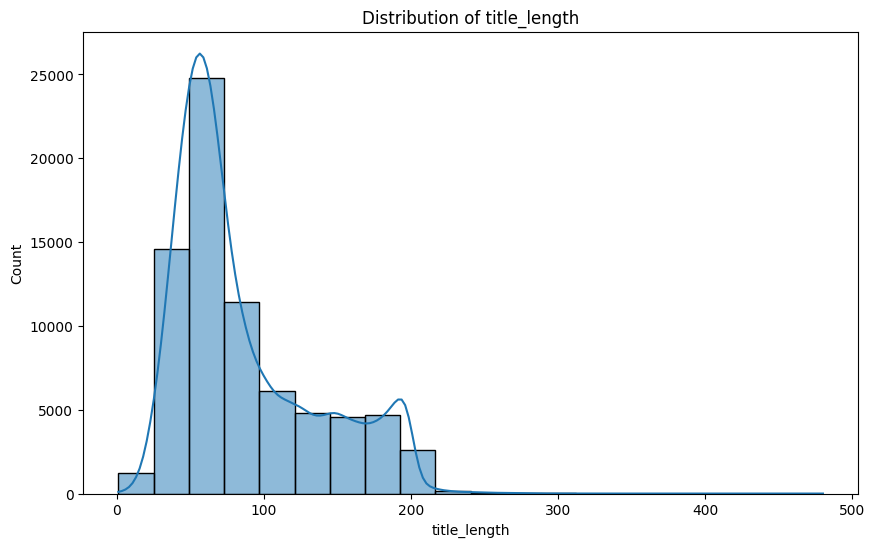

In [38]:
num_cols = ['price', 'value', 'bullet_count', 'desc_length', 'title_length']
for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True , bins =20)
    plt.title(f'Distribution of {col}')


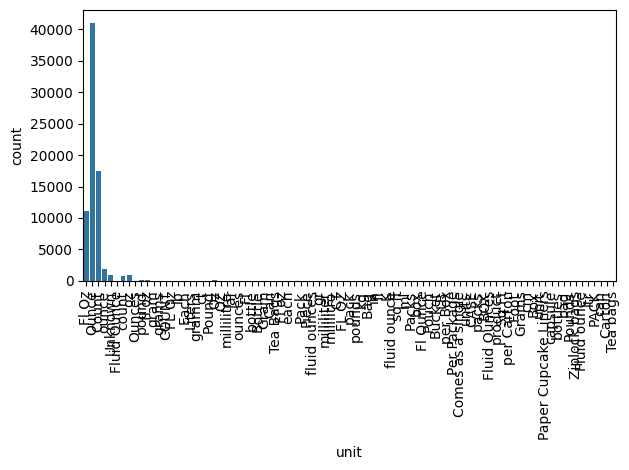

In [39]:
sns.countplot(data=data, x='unit')
plt.xticks(rotation=90) # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

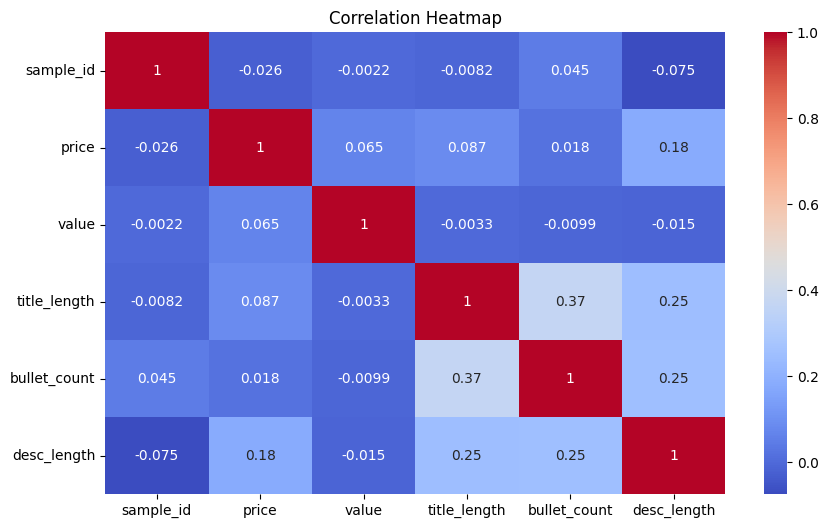

In [40]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Define the numeric columns to cap outliers
numeric_cols_to_cap = ['price', 'value', 'title_length', 'bullet_count', 'desc_length']

# Apply capping at the 5th and 95th percentiles
for col in numeric_cols_to_cap:
    if col in data.columns:
        lower_bound = data[col].quantile(0.05)
        upper_bound = data[col].quantile(0.95)
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers have been capped at the 5th and 95th percentiles for the following columns:")
print(numeric_cols_to_cap)

Outliers have been capped at the 5th and 95th percentiles for the following columns:
['price', 'value', 'title_length', 'bullet_count', 'desc_length']


In [42]:
from nltk.corpus import stopwords
import string

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Add punctuation to the set of stop words for removal
stop_words.update(string.punctuation)

# Function to remove stop words and punctuation
def remove_stopwords_and_punctuation(text):
    if isinstance(text, str):
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Convert to lowercase and remove stop words
        return ' '.join([word for word in text.lower().split() if word not in stop_words])
    return text # Return non-string types as they are

# Apply the function to the relevant text columns
text_cols = ['catalog_content', 'title', 'description', 'bullet_1', 'bullet_2', 'bullet_3', 'bullet_4', 'bullet_5']
for col in text_cols:
    if col in data.columns:
        data[col] = data[col].apply(remove_stopwords_and_punctuation)

print("Stop words and punctuation removed from text columns.")

Stop words and punctuation removed from text columns.


In [43]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    if col == 'bullets':  # Skip the 'bullets' column
        continue
    print(f"Value counts for column: {col}")
    # Display top 10 most frequent values for columns with many unique values, otherwise display all
    if data[col].nunique() > 50:
        print(data[col].value_counts().head(10))
    else:
        print(data[col].value_counts())
    print("\n" + "="*30 + "\n")

Value counts for column: catalog_content
catalog_content
item name papyrus everyday card 1 ea value 10 unit count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                5
item name rose’s sweetened grenadine 

In [45]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
print("Categorical columns in the dataset:")
print(categorical_cols)

Categorical columns in the dataset:
['catalog_content', 'image_link', 'title', 'bullets', 'description', 'unit', 'bullet_1', 'bullet_2', 'bullet_3', 'bullet_4', 'bullet_5']


In [46]:
data.isnull().sum()

,0
sample_id,0
catalog_content,0
image_link,0
price,0
title,0
bullets,0
description,0
value,0
unit,0
bullet_1,0


In [47]:
initial_rows = data.shape[0]
# Exclude the 'bullets' column as it contains unhashable list types
columns_to_consider = [col for col in data.columns if col != 'bullets']
data.drop_duplicates(subset=columns_to_consider, inplace=True)
rows_after_dropping = data.shape[0]

print(f"Initial number of rows: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows removed: {initial_rows - rows_after_dropping}")

Initial number of rows: 74993
Number of rows after dropping duplicates: 74993
Number of duplicate rows removed: 0


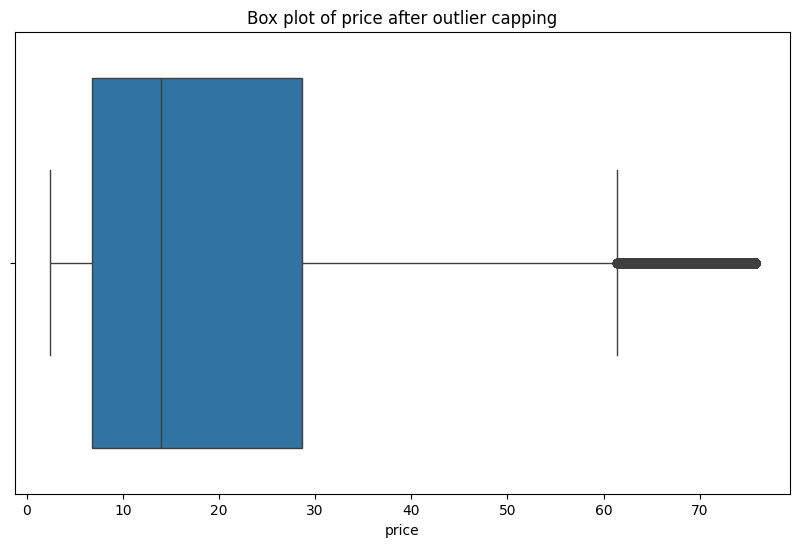

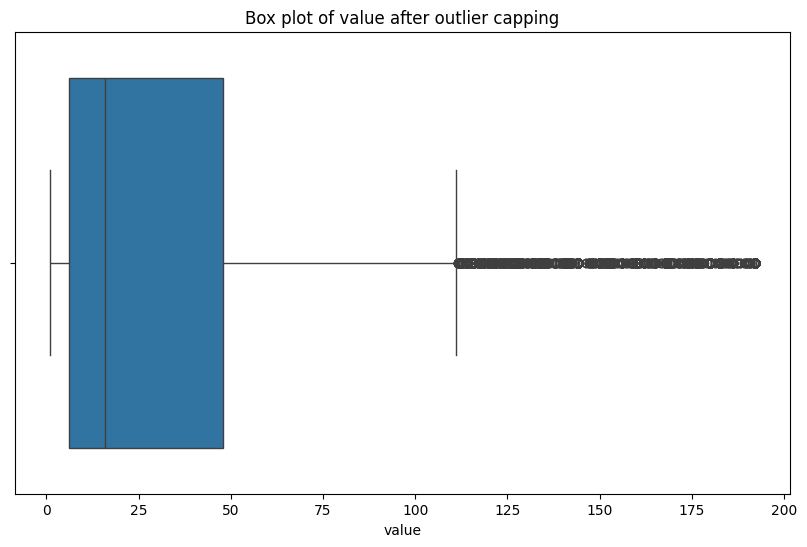

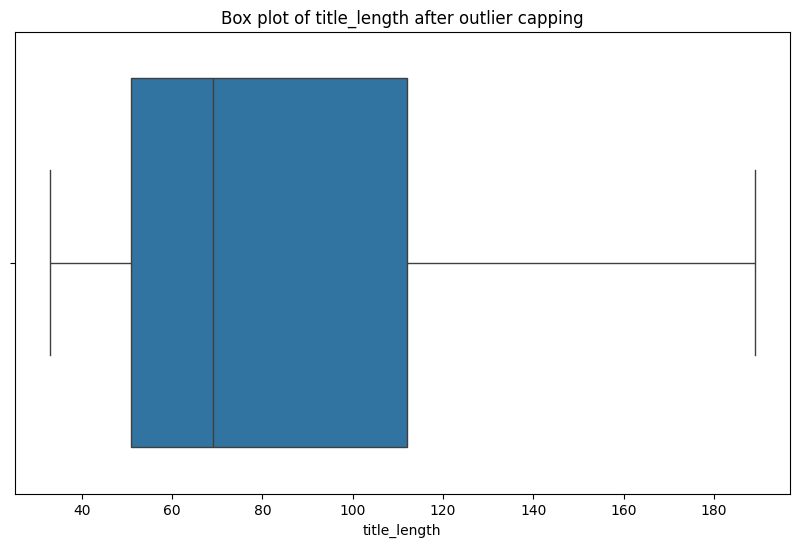

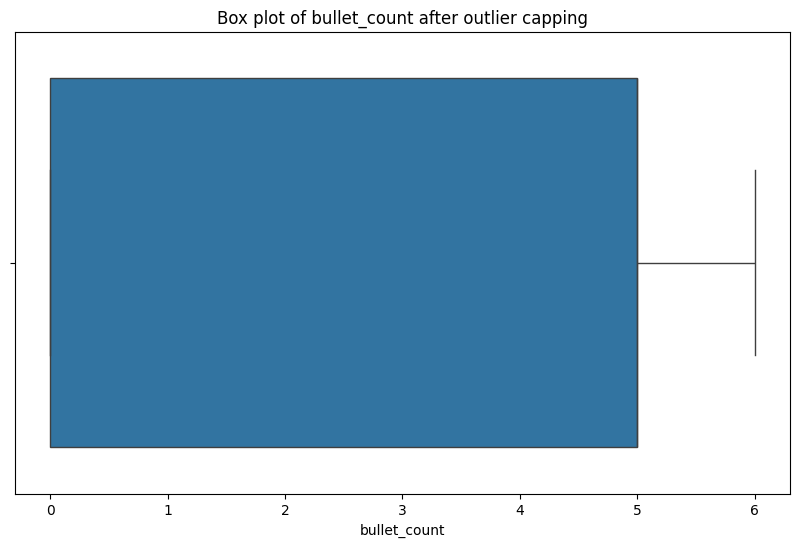

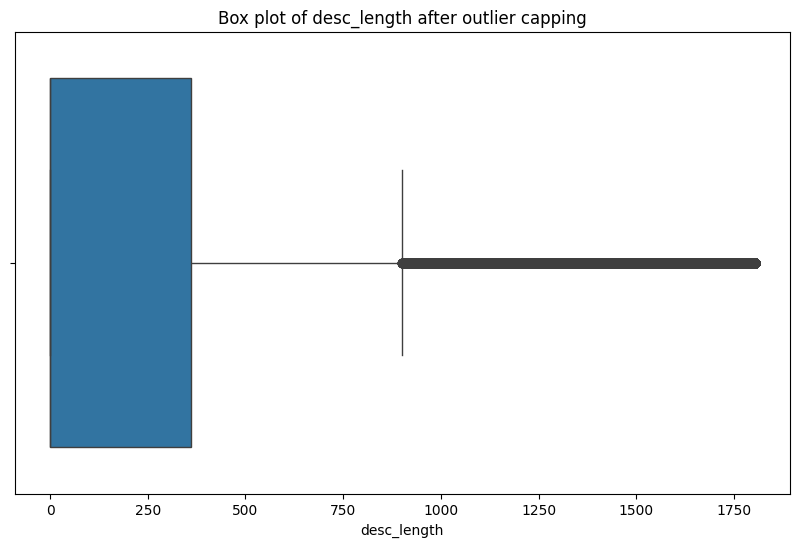

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Identify the numeric columns where outliers were capped
numeric_cols_for_outliers = ['price', 'value', 'title_length', 'bullet_count', 'desc_length']
# Filter to include only columns that are actually in the DataFrame and are numeric
numeric_cols_for_outliers = [col for col in numeric_cols_for_outliers if col in data.columns and np.issubdtype(data[col].dtype, np.number)]

# Generate box plots for each numeric column to visualize outliers after capping
for col in numeric_cols_for_outliers:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col} after outlier capping')
    plt.show()

# Task
Extract image links from the `image_link` column of the dataset, sample 5% of these links, download the corresponding images, and create a new dataset containing the sampled image links and the local file paths of the downloaded images.

## Extract image links

### Subtask:
Create a new DataFrame containing only the image links from the original dataset.


**Reasoning**:
Create a new DataFrame with only the 'image_link' column and display its head and shape.



In [49]:
image_links_df = data[['image_link']].copy()
print(image_links_df.head())
print(image_links_df.shape)

                                          image_link
0  https://m.media-amazon.com/images/I/51mo8htwTH...
1  https://m.media-amazon.com/images/I/71YtriIHAA...
2  https://m.media-amazon.com/images/I/51+PFEe-w-...
3  https://m.media-amazon.com/images/I/41mu0HAToD...
4  https://m.media-amazon.com/images/I/41sA037+Qv...
(74993, 1)


## Sample image links

### Subtask:
Randomly select 5% of the image links to download.


**Reasoning**:
Calculate the number of samples and sample the image links.



In [50]:
sample_size = int(0.05 * len(image_links_df))
sampled_image_links = image_links_df.sample(n=sample_size, random_state=42)
display(sampled_image_links.head())
print(f"Sampled {len(sampled_image_links)} image links.")

,image_link
24018,https://m.media-amazon.com/images/I/81vo4-3vHw...
53965,https://m.media-amazon.com/images/I/51Nn5IZFbX...
31111,https://m.media-amazon.com/images/I/81l3ioS4Hx...
47525,https://m.media-amazon.com/images/I/71lcmqIzuO...
59034,https://m.media-amazon.com/images/I/61DHcGzirE...


Sampled 3749 image links.


## Download images

### Subtask:
Iterate through the sampled image links and download each image, saving them to a local directory.


**Reasoning**:
Iterate through the sampled image links and download each image, saving them to a local directory.



In [51]:
import os
import requests

# Create a directory named downloaded_images if it doesn't already exist
if not os.path.exists('downloaded_images'):
    os.makedirs('downloaded_images')

# Iterate through each image link in the sampled_image_links DataFrame and download the images
for index, row in sampled_image_links.iterrows():
    image_url = row['image_link']
    try:
        # Extract the filename from the URL
        filename = os.path.basename(image_url)
        # Construct the full local file path
        local_file_path = os.path.join('downloaded_images', filename)

        # Download the image content
        response = requests.get(image_url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        # Save the image to the local file
        with open(local_file_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)

        print(f"Downloaded: {filename}")

    except requests.exceptions.RequestException as e:
        print(f"Error downloading {image_url}: {e}")
    except Exception as e:
        print(f"An error occurred while processing {image_url}: {e}")

Downloaded: 81vo4-3vHwL.jpg
Downloaded: 51Nn5IZFbXS.jpg
Downloaded: 81l3ioS4HxL.jpg
Downloaded: 71lcmqIzuOL.jpg
Downloaded: 61DHcGzirEL.jpg
Downloaded: 61D85XD1PLL.jpg
Downloaded: 61KAzF+2HoL.jpg
Downloaded: 61voq4dVh9L.jpg
Downloaded: 71TtxA90ZEL.jpg
Downloaded: 51wIMEsXspL.jpg
Downloaded: 61w6rXQeioL.jpg
Downloaded: 71HcorFU4-L.jpg
Downloaded: 51a6L03UvAL.jpg
Downloaded: 11RHBkJYc2L.jpg
Downloaded: 81DGYRQeitL.jpg
Downloaded: 61HyCh7rLcL.jpg
Downloaded: 61BjrZZYv1L.jpg
Downloaded: 51720x6pv6L.jpg
Downloaded: 61qT1s9DBEL.jpg
Downloaded: 810RPEeRsGL.jpg
Downloaded: 61seeNycSPL.jpg
Downloaded: 41NL6pC2GbL.jpg
Downloaded: 61Nz2netKtL.jpg
Downloaded: 71gA+RKk-dL.jpg
Downloaded: 61T7l1aIgtL.jpg
Downloaded: 61NJZkLG-2L.jpg
Downloaded: 71htOF2dMsL.jpg
Downloaded: 61YBNWnbHTL.jpg
Downloaded: 61bm9cZ3ghL.jpg
Downloaded: 6177F+FynIL.jpg
Downloaded: 71-RsQPxxXL.jpg
Downloaded: 91cSZM2DLWL.jpg
Downloaded: 51nji3RNLtL.jpg
Downloaded: 61gT+D4ye8L.jpg
Downloaded: 71XsO2ACIYL.jpg
Downloaded: 51tIA0MA

**Reasoning**:
The images have been downloaded. Now, create a new DataFrame to store the sampled image links and their corresponding local file paths.



In [52]:
# Create a list of dictionaries to store the data
image_data = []
for index, row in sampled_image_links.iterrows():
    image_url = row['image_link']
    filename = os.path.basename(image_url)
    local_file_path = os.path.join('downloaded_images', filename)
    image_data.append({'image_link': image_url, 'local_path': local_file_path})

# Create a new DataFrame from the list of dictionaries
downloaded_images_df = pd.DataFrame(image_data)

display(downloaded_images_df.head())
print(f"Created a new DataFrame with {len(downloaded_images_df)} entries.")

,image_link,local_path
0,https://m.media-amazon.com/images/I/81vo4-3vHw...,downloaded_images/81vo4-3vHwL.jpg
1,https://m.media-amazon.com/images/I/51Nn5IZFbX...,downloaded_images/51Nn5IZFbXS.jpg
2,https://m.media-amazon.com/images/I/81l3ioS4Hx...,downloaded_images/81l3ioS4HxL.jpg
3,https://m.media-amazon.com/images/I/71lcmqIzuO...,downloaded_images/71lcmqIzuOL.jpg
4,https://m.media-amazon.com/images/I/61DHcGzirE...,downloaded_images/61DHcGzirEL.jpg


Created a new DataFrame with 3749 entries.


## Create image dataset

### Subtask:
Create a new DataFrame with the sampled image links and potentially the local file paths of the downloaded images.


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data (if not already downloaded)
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab') # Download punkt_tab resource
nltk.download('averaged_perceptron_tagger_eng') # Download the specific English tagger

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get the part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"N": wordnet.NOUN,
                "V": wordnet.VERB,
                "A": wordnet.ADJ,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to lemmatize text
def lemmatize_text(text):
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)])
    return text

# Apply lemmatization to the specified columns
text_cols_to_lemmatize = ['catalog_content', 'description']
for col in text_cols_to_lemmatize:
    if col in data.columns:
        data[col] = data[col].apply(lemmatize_text)

print("Text normalization (lemmatization) applied to 'catalog_content' and 'description' columns.")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


Text normalization (lemmatization) applied to 'catalog_content' and 'description' columns.


**Reasoning**:
Create a new DataFrame with the sampled image links and their local file paths.



In [55]:
# Create a list of dictionaries to store the data
image_data = []
for index, row in sampled_image_links.iterrows():
    image_url = row['image_link']
    filename = os.path.basename(image_url)
    local_file_path = os.path.join('downloaded_images', filename)
    image_data.append({'image_link': image_url, 'local_path': local_file_path})

# Create a new DataFrame from the list of dictionaries
images_df = pd.DataFrame(image_data)

display(images_df.head())
print(images_df.shape)

,image_link,local_path
0,https://m.media-amazon.com/images/I/81vo4-3vHw...,downloaded_images/81vo4-3vHwL.jpg
1,https://m.media-amazon.com/images/I/51Nn5IZFbX...,downloaded_images/51Nn5IZFbXS.jpg
2,https://m.media-amazon.com/images/I/81l3ioS4Hx...,downloaded_images/81l3ioS4HxL.jpg
3,https://m.media-amazon.com/images/I/71lcmqIzuO...,downloaded_images/71lcmqIzuOL.jpg
4,https://m.media-amazon.com/images/I/61DHcGzirE...,downloaded_images/61DHcGzirEL.jpg


(3749, 2)


In [56]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained sentence transformer model
# You can choose a different model if needed, e.g., 'bert-base-nli-mean-tokens' or a smaller model like 'all-MiniLM-L6-v2'
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the 'catalog_content' column
# This might take some time depending on the size of your dataset
print("Generating embeddings for 'catalog_content'...")
embeddings = model.encode(data['catalog_content'].tolist(), show_progress_bar=True)

# Store the embeddings. You can store them as a list of arrays in a new column,
# or as a separate numpy array depending on your needs.
# Storing as a list of arrays in a column might be memory intensive for large datasets.
# For now, we'll keep it as a separate numpy array.
# data['catalog_content_embeddings'] = list(embeddings) # Option to store in DataFrame

print("Embeddings generated.")
print(f"Shape of embeddings: {embeddings.shape}")

Generating embeddings for 'catalog_content'...


Batches:   0%|          | 0/2344 [00:00<?, ?it/s]

Embeddings generated.
Shape of embeddings: (74993, 384)


In [57]:
!pip install sentence-transformers transformers

## Summary:

### Data Analysis Key Findings

*   A new DataFrame was created containing only the `image_link` column from the original dataset, which has 74,993 entries.
*   A sample of 3,749 image links was randomly selected, representing 5% of the total image links.
*   A directory named `downloaded_images` was created to store the downloaded images.
*   Images corresponding to the sampled links were downloaded and saved to the `downloaded_images` directory, with filenames extracted from the URLs.
*   A new DataFrame, `downloaded_images_df`, was created containing the sampled image links and their corresponding local file paths, with a shape of (3749, 2).

### Insights or Next Steps

*   Verify the integrity and successful download of all images by checking the existence and size of the files in the `downloaded_images` directory.
*   Integrate the `downloaded_images_df` with other relevant dataframes for further analysis or model training that requires local image access.


# Task
Extract deep image representations from the images in the `images_df` DataFrame using a pre-trained CNN model and optionally combine these features with metadata from the `data` DataFrame.

## Load images

### Subtask:
Load the images from the local file paths stored in the `images_df` DataFrame.


**Reasoning**:
Load the images from the local file paths in the `images_df` DataFrame.



In [5]:
from PIL import Image

# Initialize an empty list to store the loaded images
loaded_images = []

# Iterate through the 'local_path' column and load each image
for image_path in images_df['local_path']:
    try:
        img = Image.open(image_path)
        loaded_images.append(img)
    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
    except Exception as e:
        print(f"An error occurred while loading image from {image_path}: {e}")

print(f"Successfully loaded {len(loaded_images)} images.")

NameError: name 'images_df' is not defined

## Preprocess images

### Subtask:
Prepare the images for input into the chosen CNN model (e.g., resizing, normalization).


**Reasoning**:
Prepare the loaded images for input into a CNN model by resizing and normalizing them.



In [4]:
import numpy as np
from PIL import Image

# Define the target size for resizing the images
target_size = (224, 224)

# Initialize an empty list to store the preprocessed images
preprocessed_images = []

# Iterate through the loaded_images list and preprocess each image
for img in loaded_images:
    try:
        # Convert the image to RGB format if it's not already
        if img.mode != 'RGB':
            img = img.convert('RGB')

        # Resize the image to the target size
        img_resized = img.resize(target_size, Image.Resampling.LANCZOS)

        # Convert the resized image to a NumPy array
        img_array = np.array(img_resized)

        # Perform normalization (scaling pixel values to be between 0 and 1)
        img_array = img_array.astype('float32') / 255.0

        # Append the preprocessed image (as a NumPy array) to the list
        preprocessed_images.append(img_array)

    except Exception as e:
        print(f"An error occurred while preprocessing image: {e}")

# Convert the list of preprocessed images into a single NumPy array
preprocessed_images_array = np.array(preprocessed_images)

# Print the shape of the resulting NumPy array to verify the preprocessing steps
print(f"Shape of preprocessed images array: {preprocessed_images_array.shape}")

NameError: name 'loaded_images' is not defined

## Load pre-trained cnn model

### Subtask:
Load a pre-trained CNN model (e.g., ResNet, EfficientNet, or MobileNet) without the classification head.


**Reasoning**:
Load a pre-trained CNN model without the classification head and print its summary.



In [1]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model

# Load EfficientNetB0 pre-trained on ImageNet, excluding the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Print the model summary to verify the architecture
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, None,      │          0 │ input_layer[0][0] │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, None,      │          7 │ rescaling[0][0]   │
│ (Normalization)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ normalization[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, None,      │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, None,      │        864 │ stem_conv_pad[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, None,      │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, None,      │          0 │ stem_bn[0][0]     │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, None,      │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, None,      │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, None,      │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, None,      │          0 │ block1a_activati… │
│ (Multiply)          │ None, 32)         │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, None,      │        512 │ block1a_se_excit

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

## Extract image features

### Subtask:
Pass the preprocessed images through the CNN model to extract the deep image representations (features).


**Reasoning**:
Pass the preprocessed images through the CNN model to extract the deep image representations and print the shape of the resulting features.



In [3]:
# Pass the preprocessed images through the base_model to extract features
image_features = base_model.predict(preprocessed_images_array)

# Print the shape of the extracted features
print(f"Shape of extracted image features: {image_features.shape}")

NameError: name 'preprocessed_images_array' is not defined